In [35]:
%matplotlib inline
from collections import defaultdict
import sys

import numpy as np
import tables
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fname = '../raw/total-3L.h5'

In [3]:
#store = pd.HDFStore(fname, 'r')
store = tables.open_file(fname, 'r')

In [4]:
for n in store.get_node('/'):  # .root
    print(n)
for n in store.get_node('/3L'): # .3L
    print(n)

/3L (Group) ''
/3L/calldata (Group) ''
/3L/samples (Array(765,)) ''
/3L/variants (Group) ''


In [5]:
samples = store.get_node('/3L/samples').read()
print(type(samples))
print(samples[:10])

<class 'numpy.ndarray'>
[b'AB0085-C' b'AB0087-C' b'AB0088-C' b'AB0089-C' b'AB0090-C' b'AB0091-C'
 b'AB0092-C' b'AB0094-C' b'AB0095-C' b'AB0097-C']


In [6]:
call_data = store.get_node('/3L').calldata
samples = store.get_node('/3L/samples')
variants = store.get_node('/3L/variants')
variants.POS[-1]

41956556

In [7]:
samples[:10]

array([b'AB0085-C', b'AB0087-C', b'AB0088-C', b'AB0089-C', b'AB0090-C',
       b'AB0091-C', b'AB0092-C', b'AB0094-C', b'AB0095-C', b'AB0097-C'], 
      dtype='|S8')

In [8]:
# store['/3L/variants/ANN']  # no no no!

In [9]:
# no no no
#for rec in store['/3L/variants/ANN']:
#    print(rec)
#    break

## Size of objects

In [10]:
annotations_np = variants.ANN.read()  # load time

In [11]:
print(type(annotations_np))
annotations_np[0]

<class 'numpy.ndarray'>


(b'T', b'intergenic_region', b'MODIFIER', b'AGAP010310', b'AGAP010310', b'intergenic_region', b'AGAP010310', b'.', -1, b'.', b'.', -1, -1, -1, -1, -1, -1, -1)

In [12]:
ann = store.get_node('/3L/variants/ANN')
print(type(ann))
for i, rec in enumerate(ann):
    print(rec.nrow)
    print(rec.fetch_all_fields())
    if i == 1:
        break

<class 'tables.table.Table'>
0
(b'T', b'intergenic_region', b'MODIFIER', b'AGAP010310', b'AGAP010310', b'intergenic_region', b'AGAP010310', b'.', -1, b'.', b'.', -1, -1, -1, -1, -1, -1, -1)
1
(b'A', b'intergenic_region', b'MODIFIER', b'AGAP010310', b'AGAP010310', b'intergenic_region', b'AGAP010310', b'.', -1, b'.', b'.', -1, -1, -1, -1, -1, -1, -1)


In [13]:
#This is not very honest and a complex problem...
print(sys.getsizeof(annotations_np))
print(sys.getsizeof(ann))
print(ann.size_in_memory)
print(ann.size_on_disk)

1841849959
112
1841849863
47705417


# Exploration

## Number of markers

#number of bi-allelic SNPs with all call data and

In [14]:
accessibility_array = store.get_node('/3L/variants/Accessible')
accessibility_array.shape

(9643193,)

In [15]:
alt_alleles = store.get_node('/3L/variants/AC')
total_alleles = store.get_node('/3L/variants/AN')

In [16]:
print(total_alleles.size_on_disk)
print(total_alleles.size_in_memory)

365952
19286386


In [17]:
print(alt_alleles.shape)
print(total_alleles.shape)

(9643193, 3)
(9643193,)


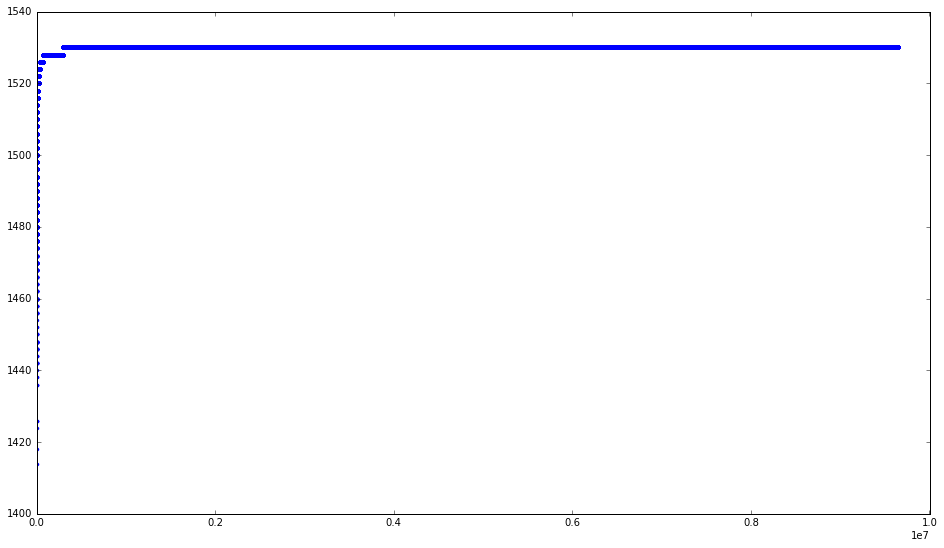

In [21]:
total_alleles_read = total_alleles.read()
total_alleles_read.sort()

In [41]:
num_alts = [len(list(filter(lambda x: x>0, alts))) for alts in alt_alleles.iterrows()]

In [42]:
num_alts_count = [0, 0, 0]
for num in num_alts:
    num_alts_count[num - 1] += 1

([<matplotlib.patches.Wedge at 0x7ff24ea97550>,
  <matplotlib.text.Text at 0x7ff24e97f390>])

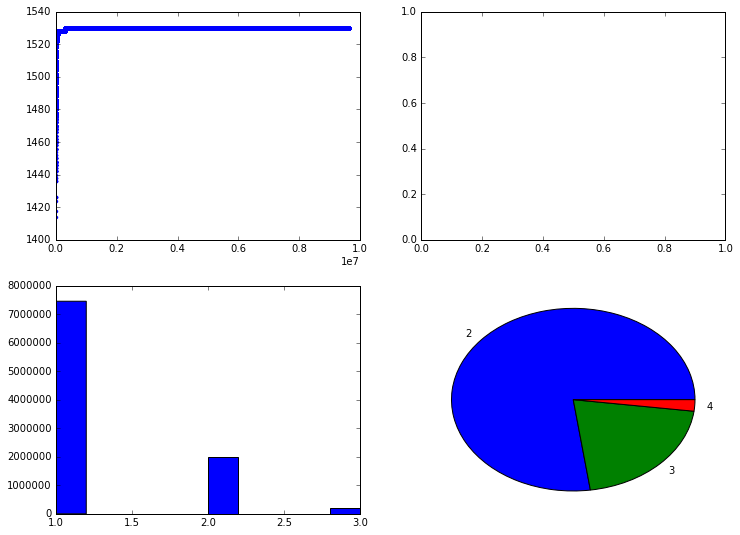

In [43]:
fig, ax = plt.subplots(2, 2, squeeze=False, figsize=(12,9))
ax[0, 0].plot(total_alleles_read, '.')
ax[1, 0].hist(num_alts)
ax[1, 1].pie(num_alts_count, labels=range(2, 5))

# store ref

In [19]:
store

File(filename=../raw/total-3L.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/3L (Group) ''
/3L/samples (Array(765,)) ''
  atom := StringAtom(itemsize=8, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/3L/calldata (Group) ''
/3L/calldata/AD (EArray(9643193, 765, 4), zlib(3)) ''
  atom := UInt16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1638, 10, 4)
/3L/calldata/DP (EArray(9643193, 765), zlib(3)) ''
  atom := UInt16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (6553, 10)
/3L/calldata/GQ (EArray(9643193, 765), zlib(3)) ''
  atom := UInt8Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := (13107, 10)
/3L/calldata/genotype (EArray(9643193, 765, 2), zlib(3)) ''
  atom := Int8Atom(